In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, roc_auc_score, f1_score

In [3]:
df = pd.read_csv('score_low_col.csv', sep=',')
Y = df['score']
X = df.drop('score', axis=1)

In [5]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

rf_clf = RandomForestRegressor(n_estimators=10, random_state=10)

kfold_validacion = KFold(10)

# MSE scores
mse_scores = cross_val_score(rf_clf, X, Y, cv=kfold_validacion, scoring='neg_mean_squared_error')
print("MSE scores:", mse_scores)
rf_mse = mse_scores.mean()

# MAE scores
mae_scores = cross_val_score(rf_clf, X, Y, cv=kfold_validacion, scoring='neg_mean_absolute_error')
print("MAE scores:", mae_scores)
rf_mae = mae_scores.mean()

# RMSE from MSE scores
rmse_scores = np.sqrt(np.abs(mse_scores))
print("RMSE scores:", rmse_scores)
rf_rmse = rmse_scores.mean()

# R2 scores
r2_scores = cross_val_score(rf_clf, X, Y, cv=kfold_validacion, scoring='r2')
print("R-squared scores:", r2_scores)
rf_r2 = r2_scores.mean()

MSE scores: [-0.35313996 -0.12073934 -0.27205429 -3.55756431 -0.21308617 -0.23968158
 -0.04425401 -0.19228099 -0.8561667  -1.62260173]
MAE scores: [-0.101171 -0.069228 -0.088694 -0.149259 -0.075239 -0.083334 -0.056952
 -0.066198 -0.103976 -0.14624 ]
RMSE scores: [0.59425581 0.34747567 0.52158824 1.88615066 0.46161258 0.48957285
 0.21036636 0.43849857 0.92529277 1.27381385]
R-squared scores: [0.89245332 0.9068699  0.89656875 0.64812579 0.89749231 0.89392586
 0.95892436 0.92448967 0.78640818 0.77539065]


In [6]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

nn = KNeighborsRegressor(n_neighbors=5)

kfold_validacion = KFold(10)

# MSE scores
mse_scores = cross_val_score(nn, X, Y, cv=kfold_validacion, scoring='neg_mean_squared_error')
print("MSE scores:", mse_scores)
nn_mse = mse_scores.mean()

# MAE scores
mae_scores = cross_val_score(nn, X, Y, cv=kfold_validacion, scoring='neg_mean_absolute_error')
print("MAE scores:", mae_scores)
nn_mae = mae_scores.mean()

# RMSE from MSE scores
rmse_scores = np.sqrt(np.abs(mse_scores))
print("RMSE scores:", rmse_scores)
nn_rmse = rmse_scores.mean()

# R2 scores
r2_scores = cross_val_score(nn, X, Y, cv=kfold_validacion, scoring='r2')
print("R-squared scores:", r2_scores)
nn_r2 = r2_scores.mean()

MSE scores: [-3.31495024 -1.3499587  -2.78905832 -9.64486884 -2.48439448 -1.84137266
 -1.50752962 -2.79291548 -3.96235078 -7.15722382]
MAE scores: [-0.61773  -0.54182  -0.572806 -0.740692 -0.682292 -0.594196 -0.561738
 -0.643884 -0.67502  -0.747004]
RMSE scores: [1.82070048 1.16187723 1.6700474  3.10561891 1.57619621 1.35697187
 1.22781498 1.67120181 1.99056544 2.67529883]
R-squared scores: [-0.00954838 -0.04126618 -0.06036116  0.04603817 -0.19514809  0.18507708
 -0.39925729 -0.09680086  0.01149423  0.00925819]


In [7]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

neural = MLPRegressor()
kfold_validacion = KFold(10)

# MSE scores
mse_scores = cross_val_score(neural, X, Y, cv=kfold_validacion, scoring='neg_mean_squared_error')
print("MSE scores:", mse_scores)
neural_mse = mse_scores.mean()

# MAE scores
mae_scores = cross_val_score(neural, X, Y, cv=kfold_validacion, scoring='neg_mean_absolute_error')
print("MAE scores:", mae_scores)
neural_mae = mae_scores.mean()

# RMSE from MSE scores
rmse_scores = np.sqrt(np.abs(mse_scores))
print("RMSE scores:", rmse_scores)
neural_rmse = rmse_scores.mean()

# R2 scores
r2_scores = cross_val_score(neural, X, Y, cv=kfold_validacion, scoring='r2')
print("R-squared scores:", r2_scores)
neural_r2 = r2_scores.mean()

MSE scores: [ -3.48904147  -2.88269729  -8.45087108 -10.14727173  -1.99228487
  -1.83705389  -1.55891518  -2.08425208  -3.55083387  -6.48241583]
MAE scores: [-2.45155875 -0.65546044 -0.51664967 -0.94284243 -0.95755037 -0.98043506
 -0.61516963 -0.75718645 -0.69717687 -0.71559088]
RMSE scores: [1.86789761 1.69785078 2.9070382  3.18547826 1.41148322 1.35537961
 1.24856525 1.4436939  1.88436564 2.54605888]
R-squared scores: [ 0.19227206 -0.3914026   0.18161176  0.10039132 -0.5612906  -0.39628548
  0.16361468 -0.63102851  0.00177954  0.13535044]


In [8]:
mse = [rf_mse, nn_mse, neural_mse]
mae = [rf_mae, nn_mae, neural_mae]
rmse = [rf_rmse, nn_rmse, neural_rmse]
r2 = [rf_r2, nn_r2, neural_r2]
print(mse)
print(mae)
print(rmse)
print(r2)

[-0.7471569087000003, -3.6844622924, -4.247563728953415]
[-0.0940291, -0.6377182000000001, -0.9289620563446777]
[0.7148627349244694, 1.8256293155006957, 1.954781134753296]
[0.8580648803867106, -0.055051428614115626, -0.12049873938200126]


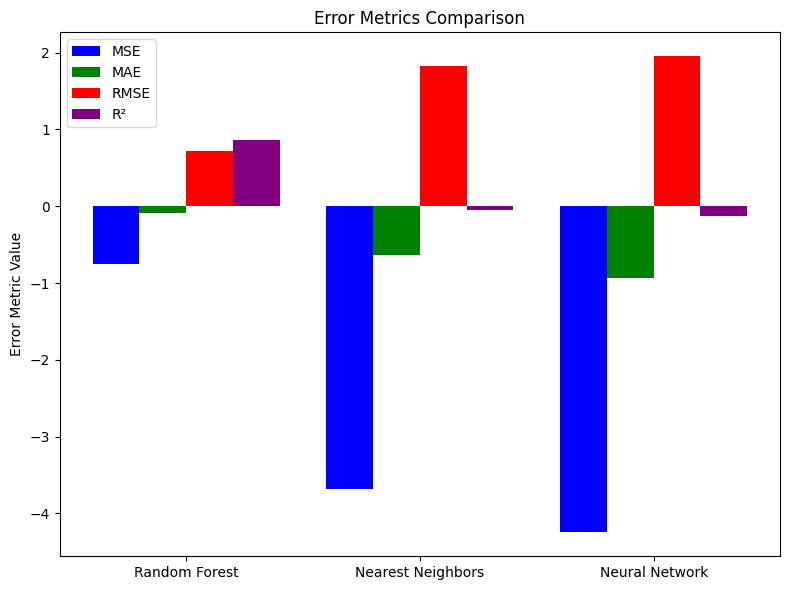

In [9]:
fig, ax = plt.subplots(figsize=(8, 6))  # Ajustar el tamaño si lo deseas

# Posiciones en X para las barras (controlar la ubicación)
x = [0, 1, 2]  # Hay 3 modelos

bar_width = 0.2
ax.bar(x, mse, label='MSE', width=bar_width, color='b')
ax.bar([i + bar_width for i in x], mae, label='MAE', width=bar_width, color='g')
ax.bar([i + bar_width * 2 for i in x], rmse, label='RMSE', width=bar_width, color='r')
ax.bar([i + bar_width * 3 for i in x], r2, label='R²', width=bar_width, color='purple')

# Set labels and title
ax.set_ylabel('Error Metric Value')
ax.set_title('Error Metrics Comparison')

# Set x-axis tick labels (customize based on your model names)
ax.set_xticks([i + bar_width * 1.5 for i in x])
ax.set_xticklabels(['Random Forest', 'Nearest Neighbors', 'Neural Network'])

# Add legend
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()
